In [2]:
from astropy.io import fits
from astropy.table import Table
from astropy.io.fits import Column
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import richardsplot
import os
from SDSSRM_11_Pix_Filter_Trevor import pixel_filter

In [13]:
data = pd.read_csv("../Nyland_quasars.csv")
data.sort_values("PLATE", inplace=True)

In [14]:
data

,col1,col2,col3,col4,col5,col6,col7,SDSS_NAME,RA,DEC,...,GAIA_PM_DEC,GAIA_PM_DEC_ERR,GAIA_G_MAG,GAIA_G_FLUX_SNR,GAIA_BP_MAG,GAIA_BP_FLUX_SNR,GAIA_RP_MAG,GAIA_RP_FLUX_SNR,SDSS2GAIA_SEP,Separation
0,J0751+3154,117.877557,31.904037,1.8640,46.57,9.47,-1.00,075130.56+315414.3,117.877369,31.903976,...,-0.085585,6.928780,19.342176,196.048447,19.626221,31.223587,18.754732,30.088135,0.028661,0.615095
1,J0800+3124,120.044683,31.415871,1.9368,46.93,9.56,-0.73,080010.70+312457.0,120.044587,31.415842,...,0.360149,9.606571,18.872179,158.566437,19.086498,23.699684,18.311010,31.076073,0.029857,0.312870
4,J1514+4000,228.520730,40.013724,2.1226,46.80,9.74,-1.04,151404.96+400049.4,228.520700,40.013748,...,0.043962,5.006464,19.089701,142.619171,19.306086,24.387455,18.601414,23.740501,0.064577,0.119612
3,J1447+0512,221.817580,5.207433,1.7475,46.36,9.02,-0.76,144716.22+051226.5,221.817586,5.207377,...,0.463810,0.658860,19.399597,171.656967,19.761215,11.174749,18.965763,18.336218,0.079926,0.202744
5,J1603+1809,240.828155,18.151432,3.2460,cdots,cdots,cdots,160318.74+180904.9,240.828123,18.151375,...,0.176698,4.659996,19.446812,308.960480,19.814861,29.760675,18.930033,37.362793,0.030836,0.232761
2,J1204+1918,181.218737,19.306199,2.3440,cdots,cdots,cdots,120452.49+191822.3,181.218734,19.306208,...,0.554862,2.099077,19.477867,190.409348,19.532427,25.579943,19.016500,28.101566,0.021882,0.032149


In [15]:
z = data[["Z"]].values.flatten()

In [21]:
specfiles = open("../Nyland_quasars_speclist.txt")
spectra = specfiles.readlines()

In [22]:
spectra.sort()

In [23]:
spectra

['0890/spec-0890-52583-0174.fits\n',
 '1061/spec-1061-52641-0187.fits\n',
 '1292/spec-1292-52736-0246.fits\n',
 '1829/spec-1829-53494-0082.fits\n',
 '3925/spec-3925-55338-0776.fits\n',
 '5846/spec-5846-56017-0858.fits\n']

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/Users/trevormccaffrey/Desktop/Research/GTR/VLA2018b/NylandSpectra/SDSSRM_11_Pix_Filter_Trevor.py:65: RuntimeWarning: invalid value encountered in subtract
  new_left_flux[k]=(start[k] - Flux_Devs_Left[k])


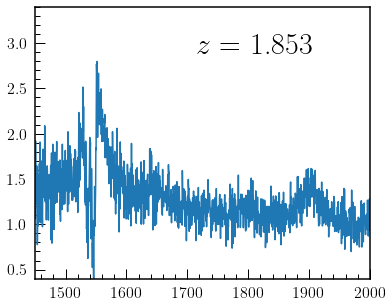

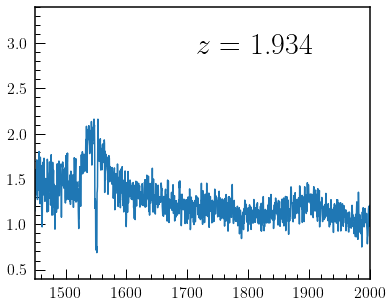

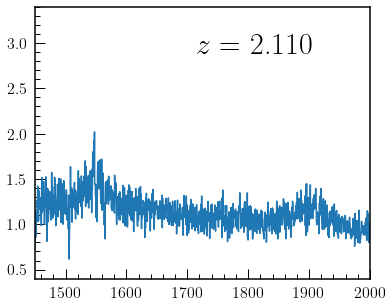

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/Users/trevormccaffrey/Desktop/Research/GTR/VLA2018b/NylandSpectra/SDSSRM_11_Pix_Filter_Trevor.py:65: RuntimeWarning: invalid value encountered in subtract
  new_left_flux[k]=(start[k] - Flux_Devs_Left[k])


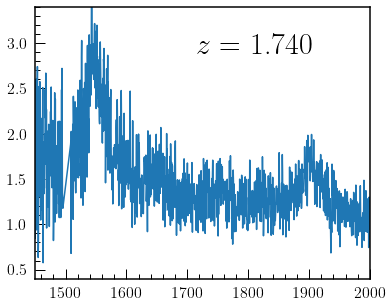

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


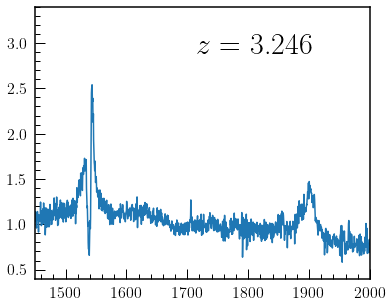

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/Users/trevormccaffrey/Desktop/Research/GTR/VLA2018b/NylandSpectra/SDSSRM_11_Pix_Filter_Trevor.py:64: RuntimeWarning: invalid value encountered in subtract
  new_right_flux[k]=(end[k] - Flux_Devs_Right[k])


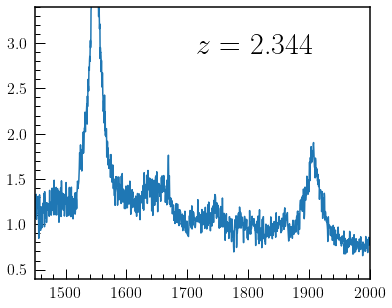

In [41]:
# Read in data for each spectrum

for i in range(len(spectra)):
    fig = plt.figure(figsize=(6,5))
    spec = fits.open(spectra[i][:-1])
    sdss_loglam = spec[1].data["LOGLAM"]
    sdss_wave   = (10.**sdss_loglam)/(1+z[i])

    #Easier to handle smoothing/whitespace this way
    #wave_range= ((sdss_wave>=1850)&(sdss_wave<=2850))
    #sdss_wave = sdss_wave#[wave_range]
    sdss_flux = spec[1].data["FLUX"]#[wave_range]
    flux_error= (1/np.sqrt(spec[1].data["ivar"]))
    mask_array= spec[1].data["AND_MASK"]#[wave_range]
    
    #take the median flux / fluxerror / S2N from Angelica's pixel filter
    continuum = [pixel_filter(sdss_wave, sdss_flux, flux_error, "Fluxes"), 
                 pixel_filter(sdss_wave, sdss_flux, flux_error, "Fluxerrs"),
                 pixel_filter(sdss_wave, sdss_flux, flux_error, "S/N")]
    
    emission1 = (sdss_wave>1860)&(sdss_wave<2000)
    emission2 = (sdss_wave>2725)&(sdss_wave<2850)
    emission_space = ((emission1)|(emission2)) #define indices for emission lines
    
    skylines  = (((sdss_wave>2468)&(sdss_wave<2498))|((sdss_wave>2609)&(sdss_wave<2643)))

    #Handle bad pixels (masked by SDSS)
    mask_array[emission_space] = 0. #emisson line pixels are not bad
    bad_pixels = (mask_array>0) #sdss pipeline bad pixels
    for j in range(len(sdss_flux)):
        if (bad_pixels[j] or skylines[j]) and not emission_space[j]:
            sdss_flux[j] = np.median(np.concatenate((sdss_flux[j-2:j],sdss_flux[j+1:j+3])))
            flux_error[j] = 0.
            
    #Now WE find the bad pixels, replace with median (i.e. continuum[0])
    for k in range(len(continuum[0])):       
        if (abs(sdss_flux[k]-continuum[0][k])>continuum[1][k]*3.0):
            sdss_flux[k]=continuum[0][k] #flux goes to median spectrum
            flux_error[k]=0.0 #continuum[1][i] #new flux error is equal to that of the median spectrum's flux error
            mask_array[k]+=(2**30) 
                            
    plt.plot(sdss_wave, sdss_flux/np.median(sdss_flux))
    plt.xlim(1450, 2000)
    plt.ylim(0.4, 3.4)
    fig.text(0.5, 0.75, "$z=$ %.3f" % z[i], fontsize=30)
    plt.show()
    spec.close()

Something weird was happening with the y-limits, so I had to set them manually... not sure why